In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Use seaborn style defaults and set the default figure size and dpi
sns.set(rc={'figure.figsize':(10, 5), 'figure.dpi':300})
sns.set_style("whitegrid")

In [14]:
# Parameters
spin = 0.998
defo = 10.0
incl = 70


# Compare RKN and RK45
# data_RK45 = pd.read_csv(r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\0926\\" + "iron_a{:.3f}.def{:.2f}.i{:.2f}.dat".format(spin, defo, incl), header=None, sep=" ")
data_RK45_compare = pd.read_csv(r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\data\rk45\\" + "iron_a{:.3f}.def{:.2f}.i{:.2f}.dat".format(spin, defo, incl), header=None, sep=" ")
# data_RKN = pd.read_csv(r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\\" + "iron_a{:.3f}.def{:.2f}.i{:.2f}.RKN.dat".format(spin, defo, incl), header=None, sep=" ")
# data_RKN_compare = pd.read_csv(r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\temp\\" + "iron_a{:.3f}.def{:.2f}.i{:.2f}.RKN.dat".format(spin, defo, incl), header=None, sep=" ")
# test = pd.read_csv(r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\\" + "iron_a{:.3f}.epsilon_r{:.2f}.epsilon_t{:.2f}.i{:.2f}.dat".format(spin, defo, defo, incl), header=None, sep=" ")
# wild_test = pd.read_csv(r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\iron_a0.998.def0.00.i70.00.RKNb.dat", header=None, sep=" ")

# plt.plot(data_RK45[0], data_RK45[1], label="RK45", color="red")
plt.plot(data_RK45_compare[0], data_RK45_compare[1], color="pink", linestyle="--")
# plt.plot(data_RKN[0], data_RKN[1], label="RKN", color="blue")
# plt.plot(data_RKN_compare[0], data_RKN_compare[1], color="cyan", linestyle="--")
# plt.plot(test[0], test[1], color="green", linestyle="--", label="Bambi test")
# plt.plot(wild_test[0], wild_test[1], color="purple", label="Wild")

plt.xlabel("Energy (keV)")
plt.ylabel("Flux")
plt.xlim(0, 10)
plt.ylim(0, 0.1)
plt.legend()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\WalkerXin\\Documents\\Scripts\\raytransfer\\ironline\\data\\rk45\\\\iron_a0.998.def10.00.i70.00.dat'

## Comparative Plots

In [16]:
def subplots(file_dir: str, spin_list: list, defpar_list:list, inc_list: list, filename_format: str=None, component: str=None, output_name: str=None):
        
    if not filename_format:
        if component:
            filename_format = file_dir + "\iron_a{:.3f}.def{:.2f}.i{:.2f}_" + f"{component}" + ".dat"
        else:
            filename_format = file_dir + "\iron_a{:.3f}.def{:.2f}.i{:.2f}.dat"
    else:
        filename_format = file_dir + filename_format
        
    counter = 0

    spin_len = len(spin_list)
    defpar_len = len(defpar_list)
    inc_len = len(inc_list)

    fig, axs = plt.subplots(spin_len, inc_len, sharex=True, sharey=True, figsize=(20, 20), dpi=300)

    for i in range(3):
        for j in range(3):
            for k in range(3):
                try:
                    filename = filename_format.format(spin_list[i], defpar_list[k], inc_list[j])
                    data = pd.read_csv(filename, sep=' ', header=None)
                    
                    # Plot data
                    axs[i, j].plot(data[0], data[1], label="def={:.2f}".format(defpar_list[k]))

                    # Annotate highest peak
                    peak = data.loc[data[1].idxmax()]
                    axs[i, j].annotate("{:.3f}".format(peak[1]), xy=(peak[0], peak[1]), xytext=(peak[0], peak[1]))

                    # Adjust x and y limits
                    axs[i, j].set_xlim(0, 10)
                    axs[i, j].set_ylim(0, 0.1)

                    counter += 1
                except:
                    continue
            
            # Show legend (deformation) for the first subplot only
            if i == 0 and j == 0:
                axs[i, j].legend()

            # Show title (inclination) for first row only
            if i == 0:
                axs[i, j].set_title('i = {:.2f}'.format(inc_list[j]))

            # Show y label (spin) for last column only, put to the right of the subplot
            if j == 2:
                axs[i, j].set_ylabel('a = {:.3f}'.format(spin_list[i]), rotation=270, labelpad=-425)

    # Tight layout
    plt.tight_layout()

    # Define the common x and y labels
    fig.text(0.5, -0.01, 'Energy (keV)', ha='center', va='center')
    fig.text(-0.01, 0.5, 'Fraction of photons', ha='center', va='center', rotation='vertical')
    
    # Add overall title
    fig.text(0.5, 1.01, 'Iron lines with deformed {} component'.format(component), ha='center', va='center', fontsize=20)
    
    # Save figure
    if output_name:
        plt.savefig(output_name)

    print('Total number of plots: {}'.format(counter))
    plt.show()

Total number of plots: 27


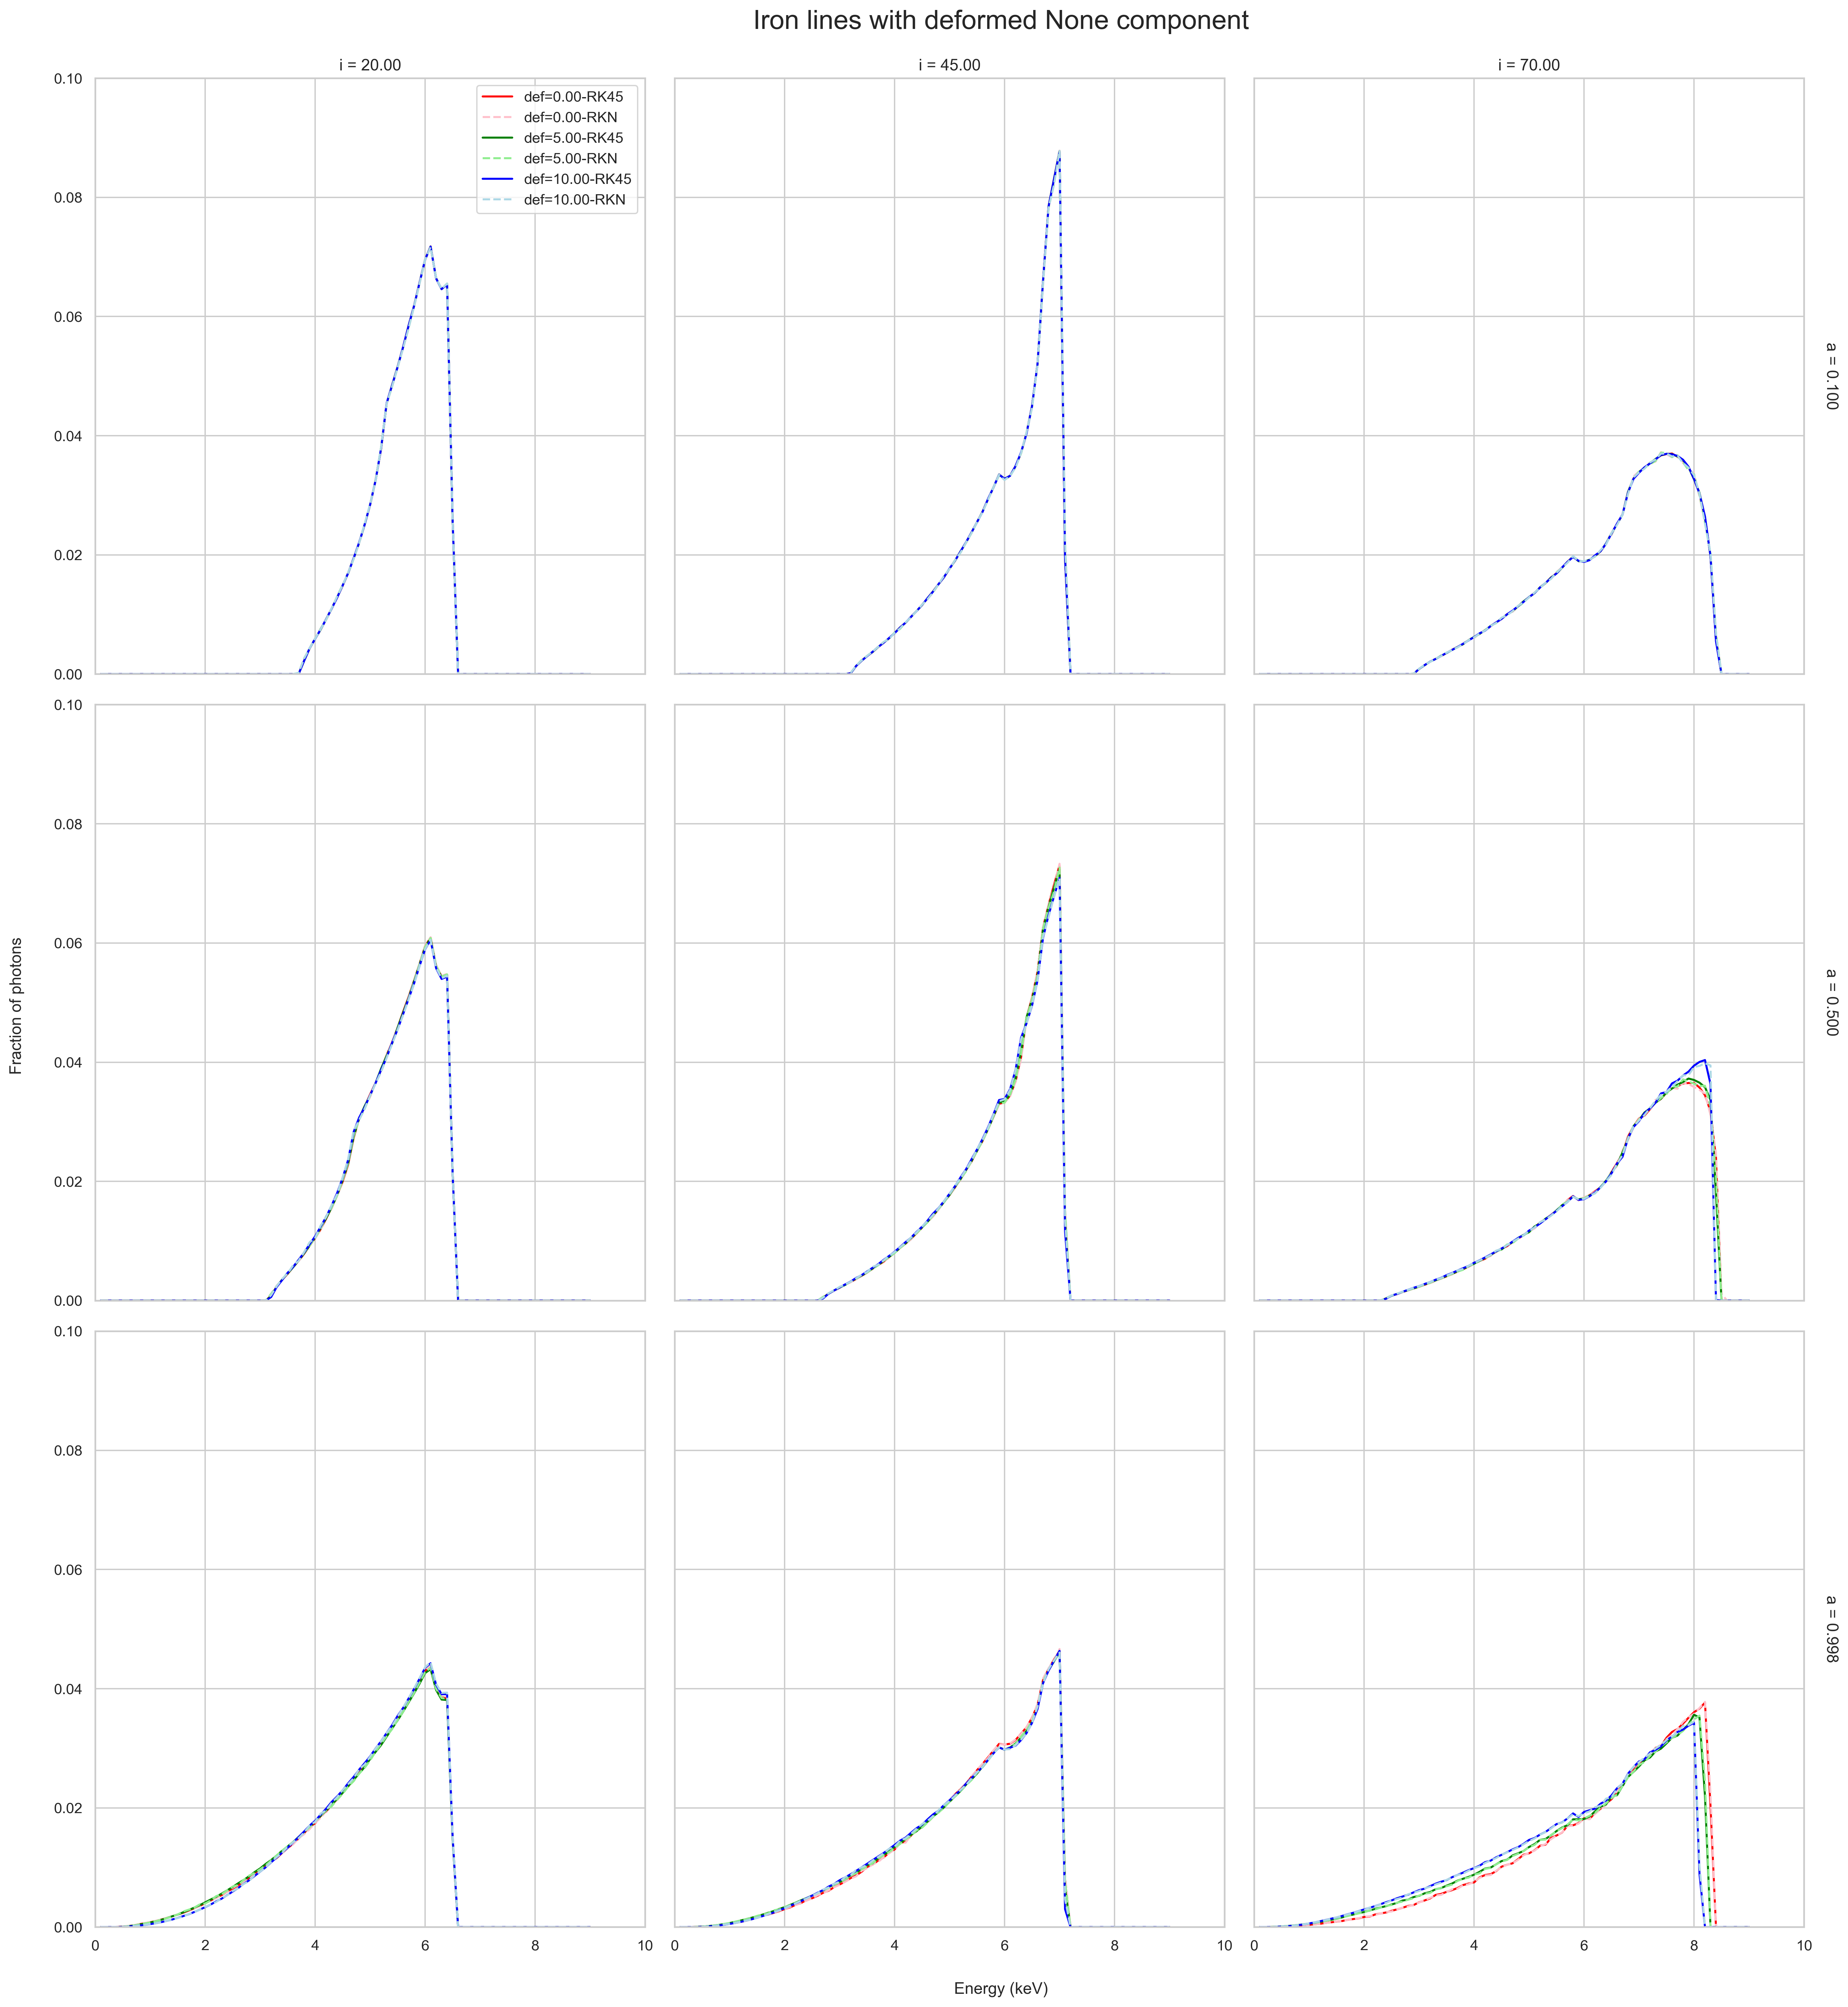

In [17]:
def subplots_compare(file_dir: str, spin_list: list, defpar_list:list, inc_list: list, filename_format: str=None, compare_format: str=None, component: str=None, annot: bool=False):
        
    if not filename_format:
        if component:
            filename_format = file_dir + "\iron_a{:.3f}.def{:.2f}.i{:.2f}_" + f"{component}" + ".dat"
        else:
            filename_format = file_dir + "\iron_a{:.3f}.def{:.2f}.i{:.2f}.dat"
    else:
        filename_format = file_dir + filename_format

    if not compare_format:
        compare_format = filename_format.replace('def', 'b1_')
    else:
        compare_format = file_dir + compare_format

    counter = 0

    spin_len = len(spin_list)
    defpar_len = len(defpar_list)
    inc_len = len(inc_list)

    fig, axs = plt.subplots(spin_len, inc_len, sharex=True, sharey=True, figsize=(20, 20), dpi=300)

    color_list = ["red", "green", "blue"]
    light_color_list = ["pink", "lightgreen", "lightblue"]

    for i in range(3):
        for j in range(3):
            for k in range(3):
                try:
                    filename = filename_format.format(spin_list[i], defpar_list[k], inc_list[j])
                    filename_compare = compare_format.format(spin_list[i], defpar_list[k], inc_list[j])
                    data = pd.read_csv(filename, sep=' ', header=None)
                    data_compare = pd.read_csv(filename_compare, sep=' ', header=None)
                    
                    # Plot data
                    axs[i, j].plot(data[0], data[1], label="def={:.2f}-RK45".format(defpar_list[k]), color=color_list[k])
                    axs[i, j].plot(data_compare[0], data_compare[1], label="def={:.2f}-RKN".format(defpar_list[k]), color=light_color_list[k], linestyle="--")


                    # Annotate highest peak
                    if annot:
                        peak = data.loc[data[1].idxmax()]
                        axs[i, j].annotate("{:.3f}".format(peak[1]), xy=(peak[0], peak[1]), xytext=(peak[0], peak[1]))
                        peak = data_compare.loc[data_compare[1].idxmax()]
                        axs[i, j].annotate("{:.3f}".format(peak[1]), xy=(peak[0], peak[1]), xytext=(peak[0], peak[1]))

                    # Adjust x and y limits
                    axs[i, j].set_xlim(0, 10)
                    axs[i, j].set_ylim(0, 0.1)

                    counter += 1
                except:
                    continue
            
            # Show legend (deformation) for the first subplot only
            if i == 0 and j == 0:
                axs[i, j].legend()

            # Show title (inclination) for first row only
            if i == 0:
                axs[i, j].set_title('i = {:.2f}'.format(inc_list[j]))

            # Show y label (spin) for last column only, put to the right of the subplot
            if j == 2:
                axs[i, j].set_ylabel('a = {:.3f}'.format(spin_list[i]), rotation=270, labelpad=-425)
        
     # Tight layout
    plt.tight_layout()

    # Define the common x and y labels
    fig.text(0.5, -0.01, 'Energy (keV)', ha='center', va='center')
    fig.text(-0.01, 0.5, 'Fraction of photons', ha='center', va='center', rotation='vertical')
    
    # Add overall title
    fig.text(0.5, 1.01, 'Iron lines with deformed {} component'.format(component), ha='center', va='center', fontsize=20)

    print('Total number of plots: {}'.format(counter))
    plt.show()

spin_list = [0.10, 0.50, 0.998]
defpar_list = [0.00, 5.00, 10.00]
inc_list = [20.0, 45.0, 70.0]

subplots_compare(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\newdata', spin_list, defpar_list, inc_list)

Total number of plots: 27


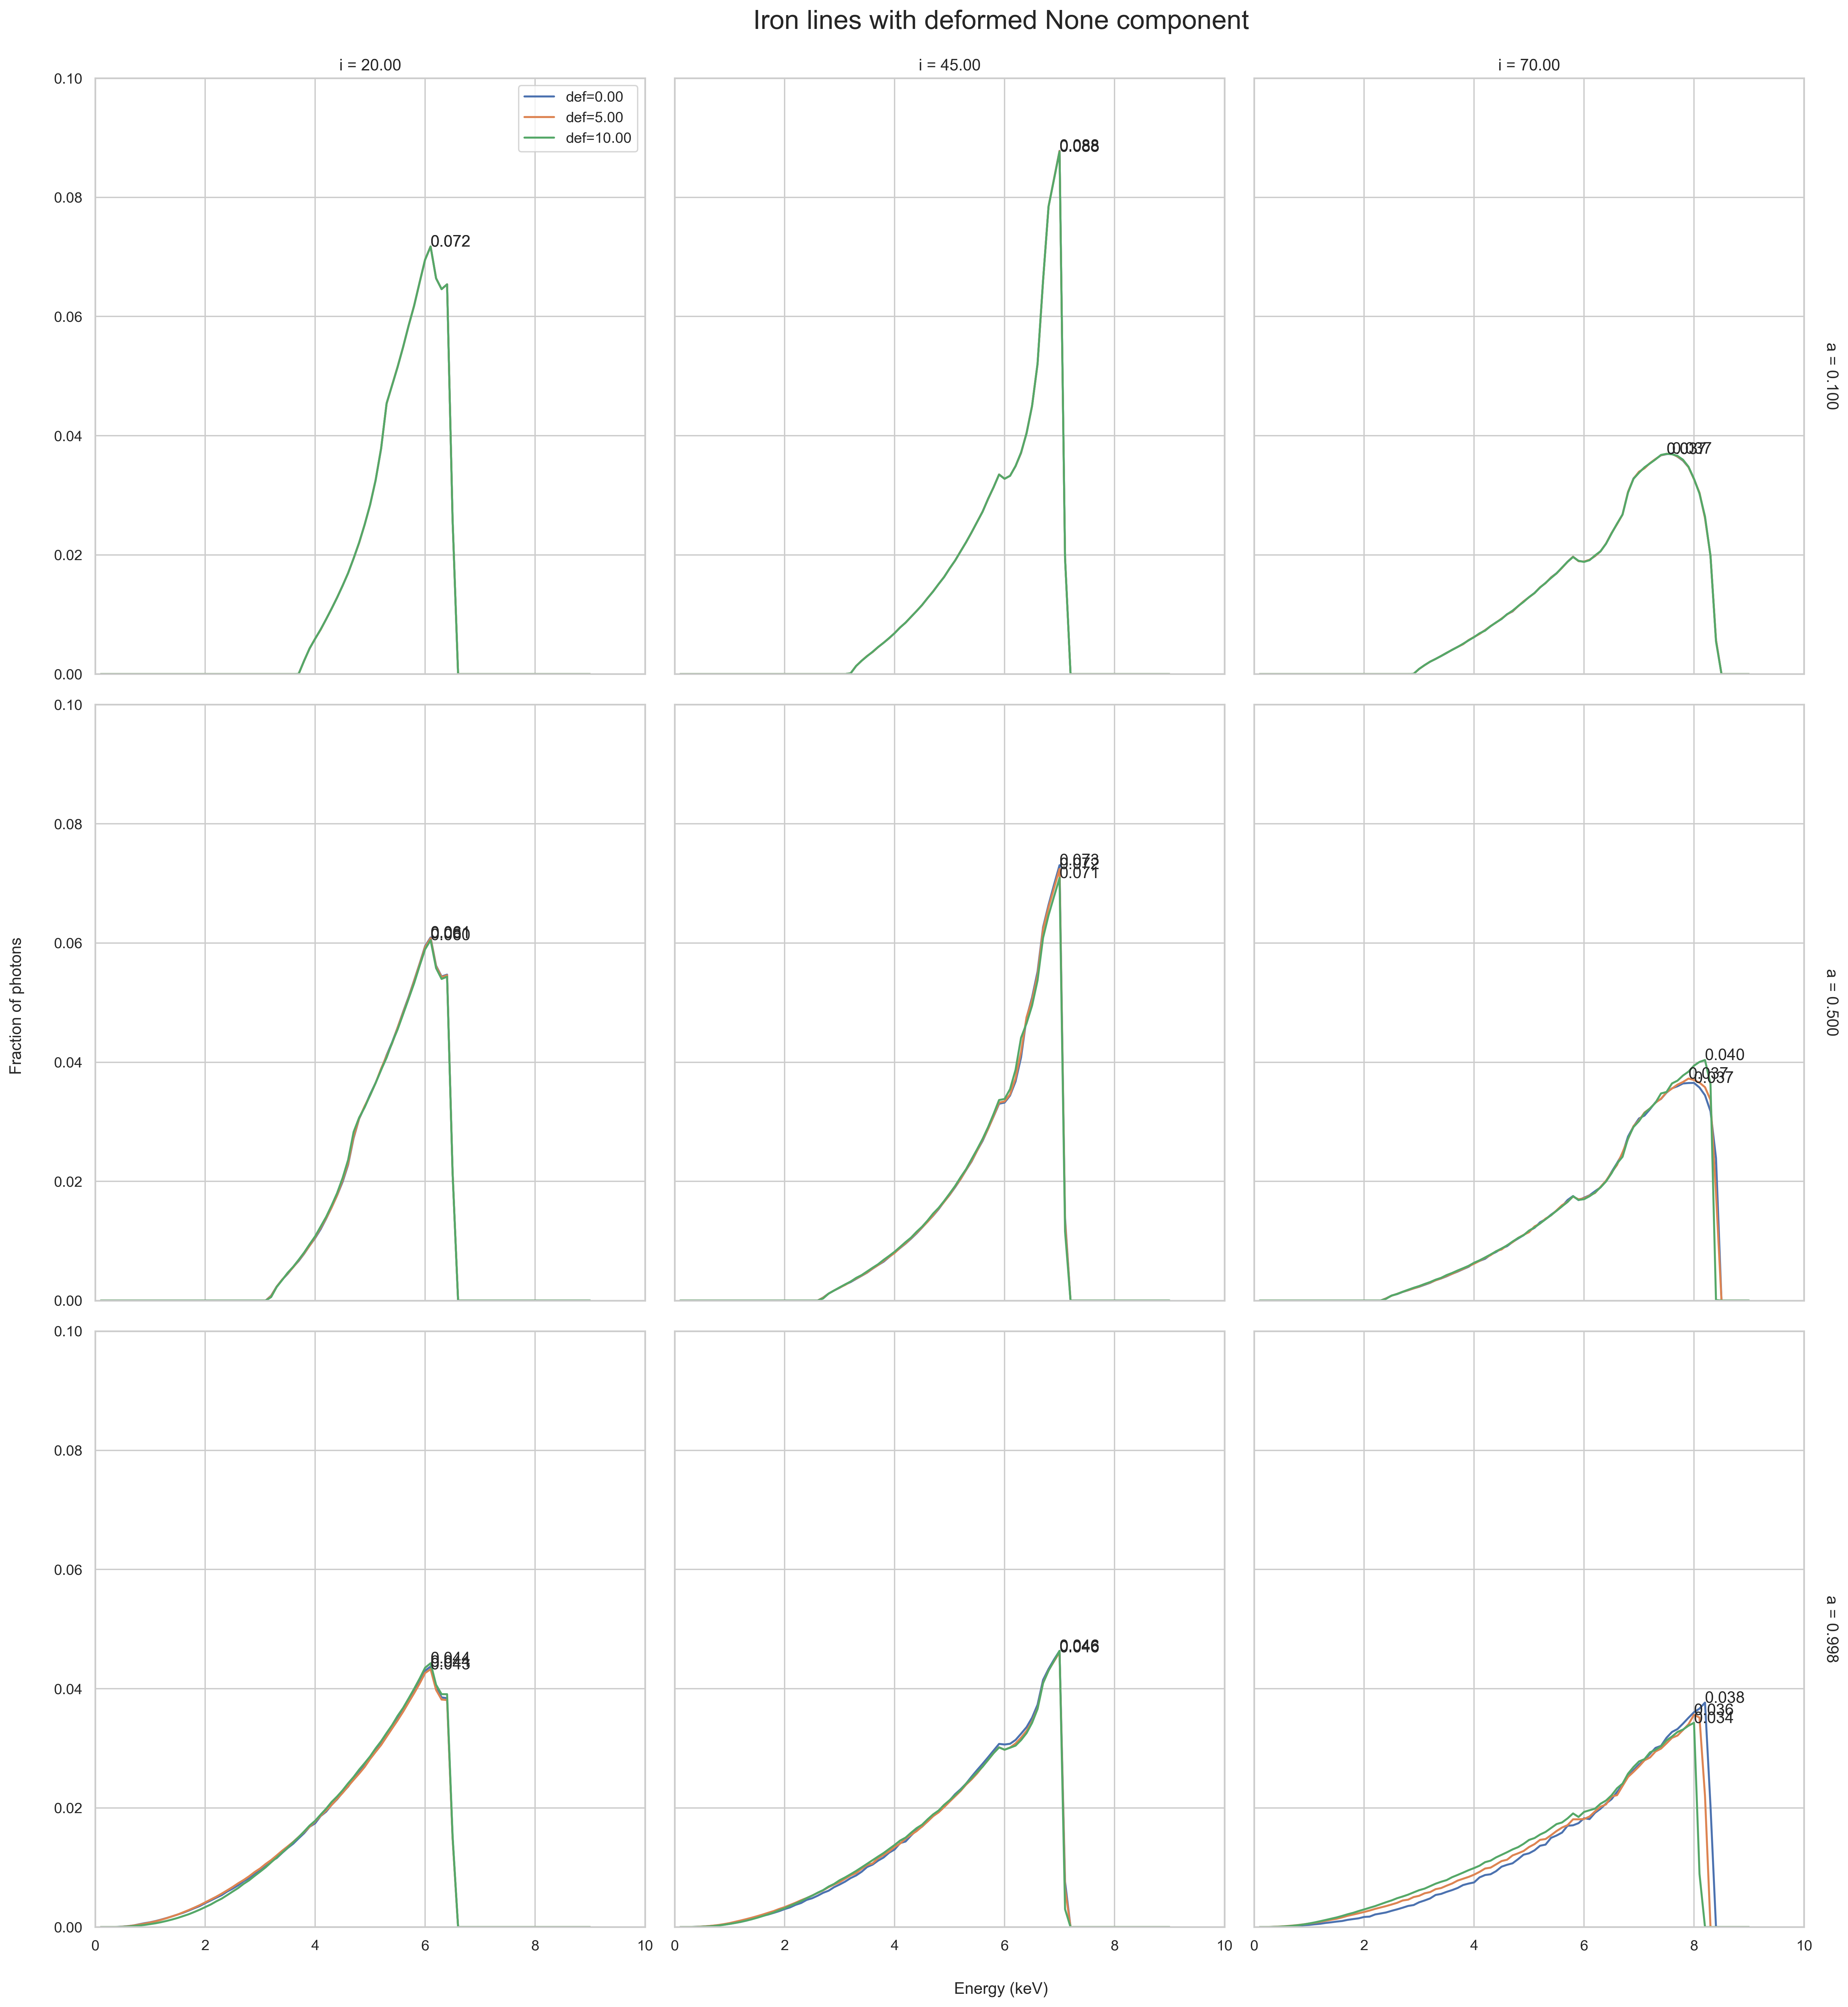

In [20]:
spin_list = [0.10, 0.50, 0.998]
defpar_list = [0.00, 5.00, 10.00]
inc_list = [20.0, 45.0, 70.0]

filename_format = "iron_a{:.3f}.def{:.2f}.i{:.2f}.dat"
compare_format = "iron_a{:.3f}.epsilon_r{:.2f}.epsilon_t0.00.i{:.2f}.dat"

subplots(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\newdata\\', spin_list, defpar_list, inc_list,
                 filename_format="iron_a{:.3f}.def{:.2f}.i{:.2f}.dat")